In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings as fts
fts("ignore")



In [66]:
df=pd.read_csv("Churn_Modelling.csv")

In [36]:
df.shape

(10000, 14)

In [37]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [39]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6780,6781,15693752,Reed,487,France,Male,37,2,0.00,2,1,1,126722.57,0
7136,7137,15689781,Ts'ai,826,France,Female,49,0,0.00,1,0,0,178709.98,1
1407,1408,15600821,Hardy,721,France,Male,69,2,108424.19,1,1,1,178418.35,0
3551,3552,15580629,Blackwood,604,France,Male,31,6,134837.58,1,1,0,192029.19,0
312,313,15674398,Russo,642,France,Male,38,3,0.00,2,0,0,171463.83,0
3988,3989,15650442,Hsieh,644,Germany,Female,32,8,141528.88,1,1,1,167087.34,1
2258,2259,15776631,Ma,466,France,Female,36,5,119540.15,1,0,1,80603.99,0
6108,6109,15761076,Lei,507,France,Male,41,3,58820.32,2,1,1,138536.09,0
840,841,15707567,Esposito,732,Germany,Male,50,6,145338.76,1,0,0,91936.10,1
7625,7626,15689692,Walker,598,Germany,Male,19,3,150348.37,1,1,1,173784.04,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [41]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [56]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [44]:
df.describe(include="O")

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [67]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

Gender
Male      5457
Female    4543
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

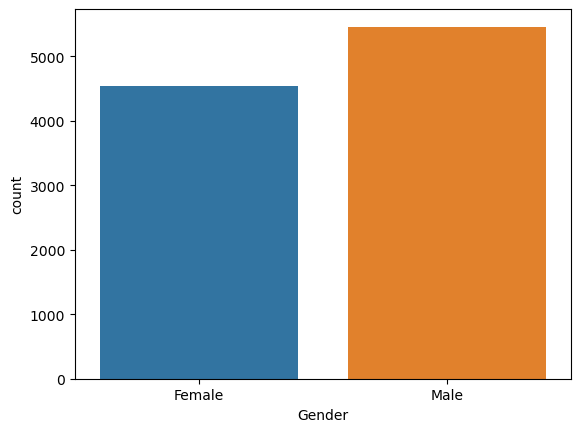

In [62]:
print(df.Gender.value_counts())
sns.countplot(x=df['Gender'])

Exited
0    7963
1    2037
Name: count, dtype: int64


<Axes: xlabel='Exited', ylabel='count'>

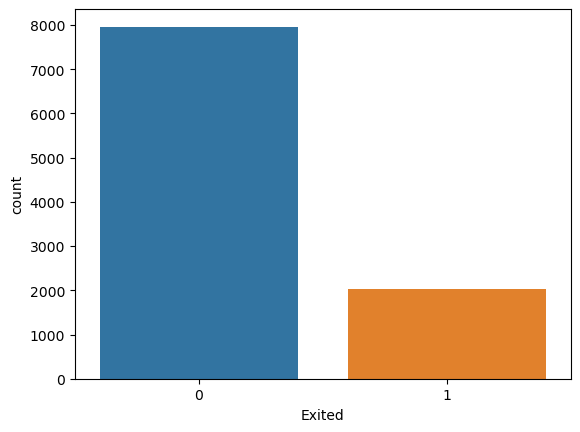

In [63]:
print(df.Exited.value_counts())
sns.countplot(x=df['Exited'])

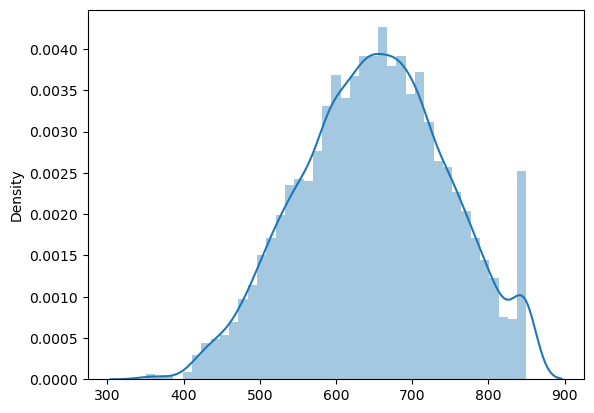

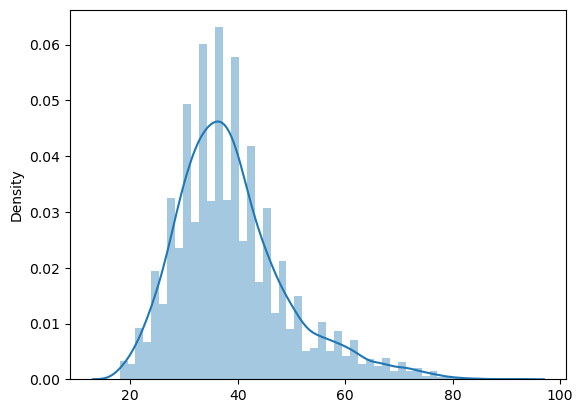

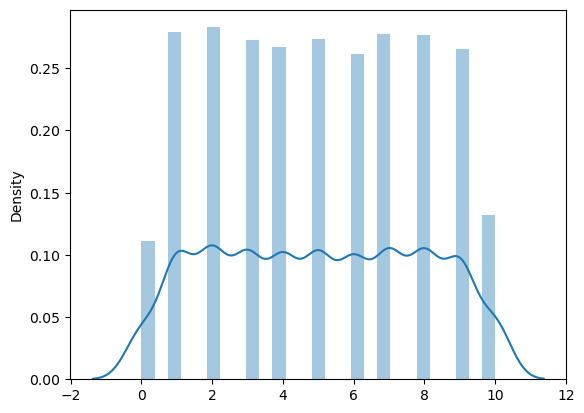

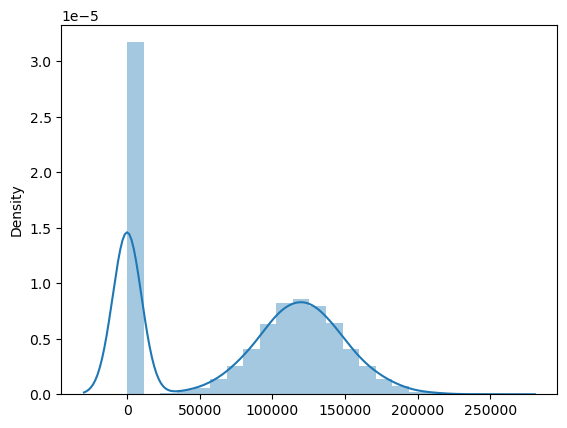

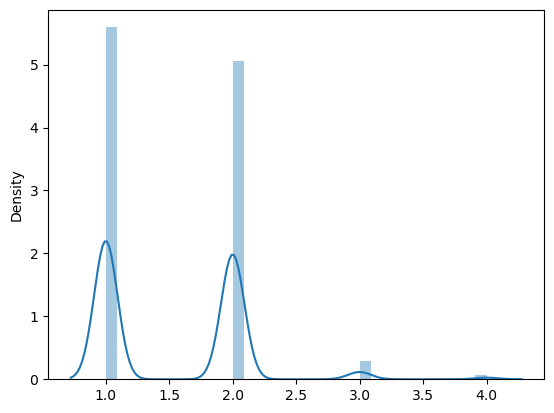

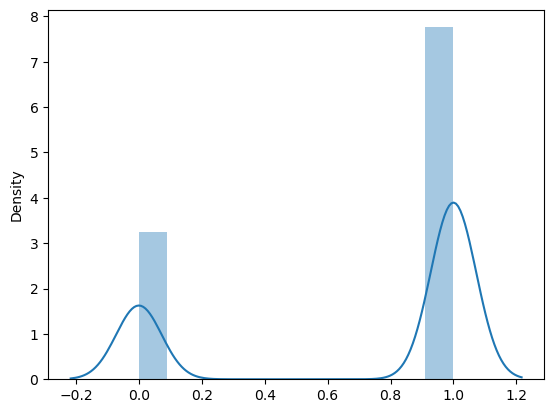

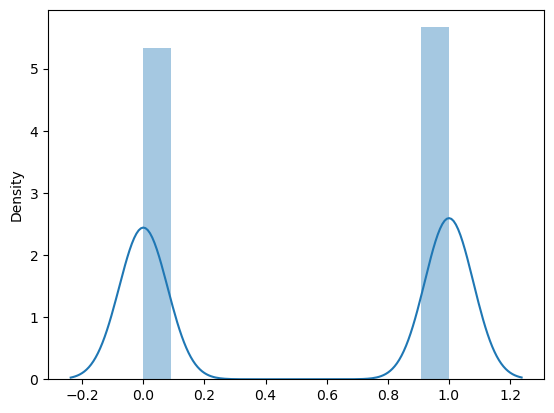

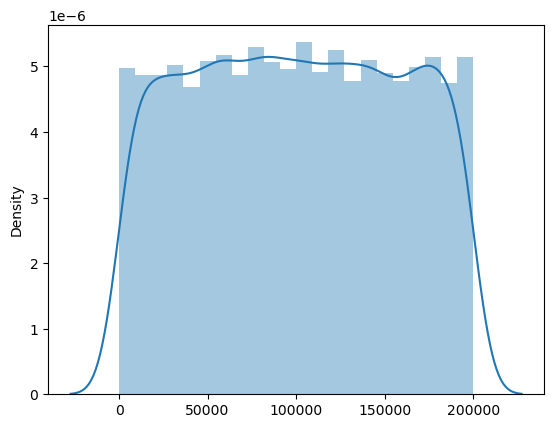

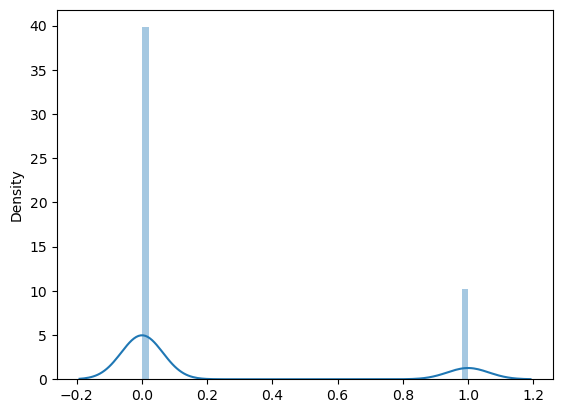

In [64]:
for i in df.describe():
    
    sns.distplot(x=df[i])
    plt.show()

In [69]:
df['Gender'] =df['Gender'].map({'Male': 1, 'Female': 0})
df['Gender'] 

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [78]:
df['Geography']=df['Geography'].map({'France':2, 'Spain':0, 'Germany':1})


In [79]:
df['Geography'].value_counts()

Geography
2    5014
1    2509
0    2477
Name: count, dtype: int64

In [86]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [82]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [96]:
from sklearn.model_selection import train_test_split as tts

In [97]:
x_train,x_test,y_train,y_test=tts(X,y,test_size=.20,random_state=42)

In [117]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 10)
(8000,)
(2000, 10)
(2000,)


In [91]:
# !pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------- ----------- 41.0

In [112]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [181]:
Model=Sequential()
Model.add(Dense(11,activation="relu",input_dim=10))
Model.add(Dense(11,activation="relu"))
Model.add(Dense(1,activation="sigmoid")) 


In [182]:
Model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 11)                121       
                                                                 
 dense_22 (Dense)            (None, 11)                132       
                                                                 
 dense_23 (Dense)            (None, 1)                 12        
                                                                 
Total params: 265 (1.04 KB)
Trainable params: 265 (1.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [183]:
Model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [184]:
history=Model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 3s 6ms/step - loss: 0.5649 - accuracy: 0.7416 - val_loss: 0.4812 - val_accuracy: 0.7987
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4693 - accuracy: 0.7944 - val_loss: 0.4450 - val_accuracy: 0.8025
Epoch 3/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4449 - accuracy: 0.8037 - val_loss: 0.4281 - val_accuracy: 0.8181
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4314 - accuracy: 0.8116 - val_loss: 0.4166 - val_accuracy: 0.8219
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4202 - accuracy: 0.8177 - val_loss: 0.4085 - val_accuracy: 0.8281
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4103 - accuracy: 0.8234 - val_loss: 0.3988 - val_accuracy: 0.8313
Epoch 7/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3991 - accuracy: 0.8302 - val_loss: 0.3916 - val_accuracy: 0.8381

Epoch 58/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3317 - accuracy: 0.8648 - val_loss: 0.3424 - val_accuracy: 0.8556
Epoch 59/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3317 - accuracy: 0.8659 - val_loss: 0.3425 - val_accuracy: 0.8550
Epoch 60/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3312 - accuracy: 0.8645 - val_loss: 0.3433 - val_accuracy: 0.8556
Epoch 61/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3306 - accuracy: 0.8655 - val_loss: 0.3437 - val_accuracy: 0.8537
Epoch 62/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3308 - accuracy: 0.8658 - val_loss: 0.3426 - val_accuracy: 0.8581
Epoch 63/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3308 - accuracy: 0.8675 - val_loss: 0.3432 - val_accuracy: 0.8562
Epoch 64/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3304 - accuracy: 0.8658 - val_loss: 0.3439 - val_accuracy:

In [185]:
Model.layers[0].get_weights()

[array([[ 0.24518439, -0.13688016,  0.03256769, -0.1051743 ,  0.02974318,
          0.0992456 , -0.19785419, -0.01443543, -0.09027635,  0.14404483,
          0.14850861],
        [-0.34631014, -0.12918139,  0.4812712 ,  0.30865192,  0.23899452,
         -0.9282747 , -0.09005   ,  0.09902672,  0.70626694, -0.07578395,
          0.4369366 ],
        [-0.07066863, -0.33352825, -0.4945273 , -0.04280254,  0.03877752,
          0.3657055 , -0.15406574,  0.14261664,  0.21257554,  0.56081074,
          0.36120972],
        [-0.06423729, -0.05792738, -1.1494634 ,  0.15262932, -0.2872581 ,
         -0.64642066,  1.5680666 , -0.38210312, -1.0127897 ,  0.45018286,
         -0.03256554],
        [ 0.4449955 , -0.31977013, -0.15457936, -0.11342414,  0.03403294,
          0.08782665, -0.23552804, -0.06832319, -0.0927484 ,  0.2145793 ,
          0.21747027],
        [ 0.05867463,  0.17410803, -0.10573845,  0.45090005,  0.17013422,
         -0.12079433, -0.40450773, -0.21381575,  0.18257917,  0.5154018

In [186]:
y_log=Model.predict(x_test)

63/63 [==============================] - 0s 3ms/step


In [187]:
y_pred=np.where(y_log>0.5,1,0)

In [188]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.861

In [189]:
history.history

{'loss': [0.5649380683898926,
  0.4693024158477783,
  0.44493281841278076,
  0.431365430355072,
  0.4202105700969696,
  0.41029906272888184,
  0.3991076648235321,
  0.38900697231292725,
  0.3792252242565155,
  0.37139320373535156,
  0.36557066440582275,
  0.35989150404930115,
  0.35583633184432983,
  0.352113276720047,
  0.3498619496822357,
  0.3480417728424072,
  0.3471295237541199,
  0.34551018476486206,
  0.3446097671985626,
  0.34357520937919617,
  0.343469500541687,
  0.34216392040252686,
  0.341583788394928,
  0.3408479392528534,
  0.3407588601112366,
  0.3401641845703125,
  0.3400721251964569,
  0.3391447961330414,
  0.33892858028411865,
  0.33838215470314026,
  0.33812659978866577,
  0.33785587549209595,
  0.33742663264274597,
  0.3374200165271759,
  0.33700162172317505,
  0.33644598722457886,
  0.3364287316799164,
  0.3364471197128296,
  0.3360157012939453,
  0.33612239360809326,
  0.33542487025260925,
  0.3350033164024353,
  0.33494389057159424,
  0.3340190649032593,
  0.3341

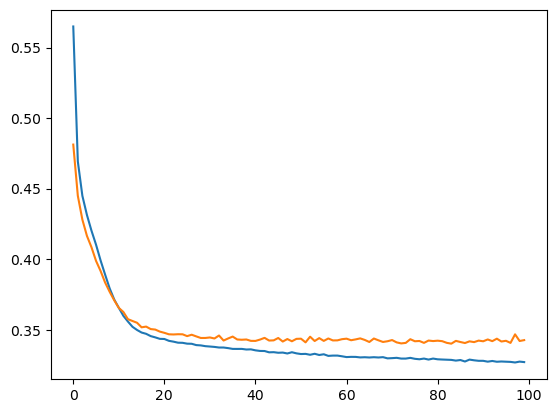

In [190]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

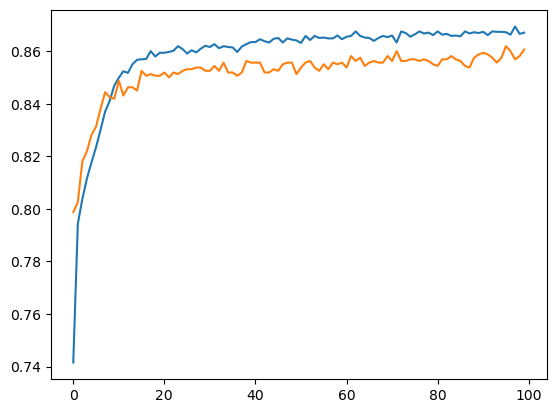

In [191]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])